In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv')

In [3]:
df.head()
df=df[:30000]

In [4]:
def encode(x):
    if x=="Normal":
        return 0
    elif x=="Depression":
        return 1
    elif x=="Suicidal":
        return 2
    elif x=="Anxiety":
        return 3
    elif x=="Stress":
        return 4
    elif x=="Bi-Polar":
        return 5
    else:
        return 6
df['status']=df['status'].apply(encode)

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   statement   29990 non-null  object
 2   status      30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.3+ KB


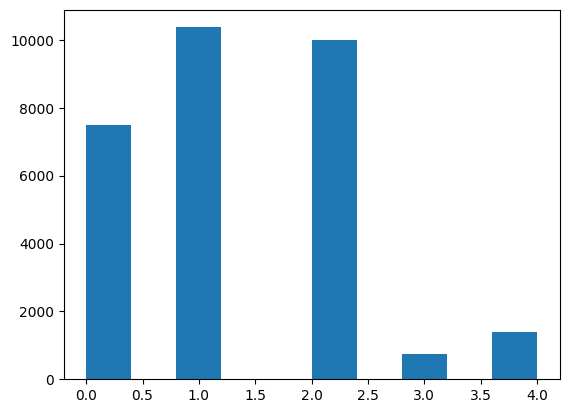

In [6]:
from matplotlib import pyplot as plt
plt.hist(df['status'])
plt.show()

So this data not balanced for different sentiments

In [7]:
df.isna().sum()
df.dropna(inplace=True)

In [8]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29990 non-null  int64 
 1   statement   29990 non-null  object
 2   status      29990 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 937.2+ KB


In [9]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
statements = df['statement']
statements = statements.apply(lambda x:x.split(" "))
statements=statements
statements

0                                           [oh, my, gosh]
1        [trouble, sleeping,, confused, mind,, restless...
2        [All, wrong,, back, off, dear,, forward, doubt...
3        [I've, shifted, my, focus, to, something, else...
4        [I'm, restless, and, restless,, it's, been, a,...
                               ...                        
29995    [Sorry, if, this, is, kinda, long..., We, met,...
29996    [Participation, is, completely, voluntary., If...
29997    [Our, justice, system, is, not, aimed, at, hel...
29998    [I, get, it;, my, one, friend, has, personal, ...
29999    [They, taunt, me, and, remind, me, of, my, wea...
Name: statement, Length: 29990, dtype: object

In [10]:
statements = statements.apply(lambda x:[stemmer.stem(word) for word in x ])
statements.head()

0                                       [oh, my, gosh]
1    [troubl, sleeping,, confus, mind,, restless, h...
2    [all, wrong,, back, off, dear,, forward, doubt...
3    [i'v, shift, my, focu, to, someth, els, but, i...
4    [i'm, restless, and, restless,, it', been, a, ...
Name: statement, dtype: object

In [11]:
statements.info()

<class 'pandas.core.series.Series'>
Index: 29990 entries, 0 to 29999
Series name: statement
Non-Null Count  Dtype 
--------------  ----- 
29990 non-null  object
dtypes: object(1)
memory usage: 468.6+ KB


In [12]:
statements[0]

['oh', 'my', 'gosh']

In [13]:
statements = statements.apply(lambda x:" ".join(x))

In [14]:
statements.head()

0                                           oh my gosh
1    troubl sleeping, confus mind, restless heart. ...
2    all wrong, back off dear, forward doubt. stay ...
3    i'v shift my focu to someth els but i'm still ...
4    i'm restless and restless, it' been a month no...
Name: statement, dtype: object

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
df['statement']=statements
from wordcloud import WordCloud
all_anxiety_words=" ".join([x for x in df['statement'][df['status']==3]])

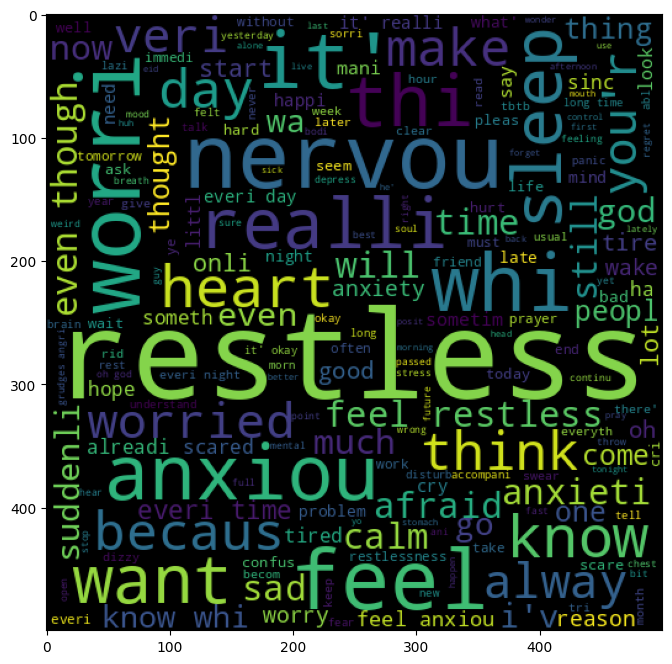

In [17]:
from wordcloud import WordCloud
word_cloud=WordCloud(width=500,height=500,random_state=6600,max_font_size=100).generate(all_anxiety_words)
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.show()

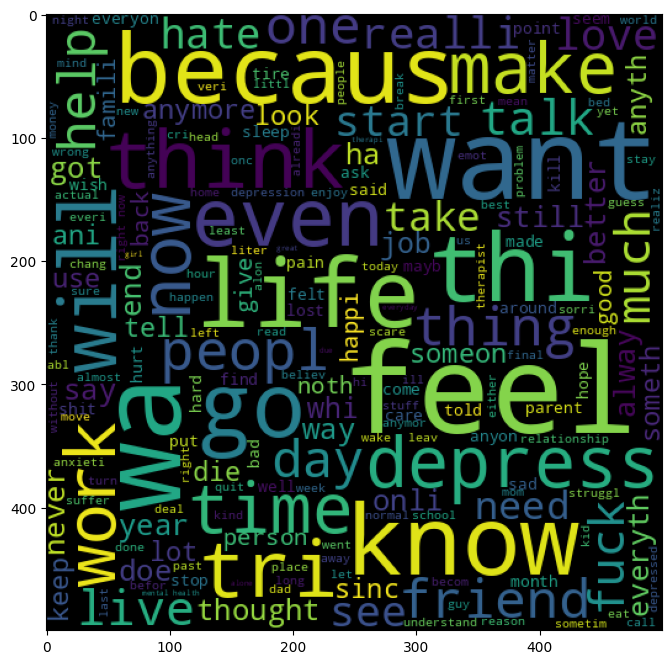

In [18]:
all_depr_words=" ".join([x for x in df['statement'][df['status']==1]])
word_cloud=WordCloud(width=500,height=500,random_state=6600,max_font_size=100).generate(all_depr_words)
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
vectors=vectorizer.fit_transform(df['statement']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(vectors,df['status'],test_size=0.2,random_state=6600)

In [21]:
train_x.shape

(23992, 39546)

In [22]:
train_y

9446     2
21605    2
6984     1
8850     1
29879    4
        ..
201      3
25676    1
5790     0
11982    2
17740    1
Name: status, Length: 23992, dtype: int64

In [23]:
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model = SVC()
# model = LogisticRegression()
model.fit(train_x,train_y)

SVC()

In [24]:
from sklearn.metrics import r2_score,f1_score,accuracy_score
y_pred=model.predict(test_x)
print("f1 score: ",f1_score(y_pred,test_y,average='micro'))
print("acc score: ",accuracy_score(y_pred,test_y))

f1 score:  0.7159053017672558
acc score:  0.7159053017672558


In [25]:
vec_Data=vectorizer.transform(["troubl sleeping, confus mind, restless heart","oh my gosh","Wait, did I lock the door and turn off the stove, or did I just think I did?"]).toarray()
pred=model.predict(vec_Data)
pred

array([3, 0, 0])